<a href="https://colab.research.google.com/github/santhoshraj10/Generating-Keywords-for-Google-Ads/blob/master/Capstone_Google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json 
from pandas.io.json import json_normalize
import datetime
pd.options.display.max_rows
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df=pd.read_csv('/content/drive/MyDrive/Capstone/train 5.csv')
json_cols = ['device', 'geoNetwork', 'totals', 'trafficSource']
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train 5.csv', converters={column: json.loads for column in json_cols})
for column in json_cols:
    column_as_df = json_normalize(df[column])
    column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
    df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
#df['fullVisitorId'] = df['fullVisitorId'].astype('str')

In [ ]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not ava

In [ ]:
!nvidia-smi

Sat Feb 20 13:41:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
df.shape

(903653, 55)

In [ ]:
df["totals_transactionRevenue"].fillna(0,inplace=True)

In [ ]:
df.totals_transactionRevenue.value_counts()

0             892138
16990000         256
18990000         189
33590000         187
44790000         170
               ...  
6826960000         1
922940000          1
20290000           1
1299350000         1
452430000          1
Name: totals_transactionRevenue, Length: 5333, dtype: int64

In [ ]:
for i in range(df.shape[0]):
    if df.totals_transactionRevenue.iloc[i]!=0:
        df.totals_transactionRevenue.iloc[i]=1

In [ ]:
df.totals_transactionRevenue.value_counts()

0    892138
1     11515
Name: totals_transactionRevenue, dtype: int64

In [ ]:
null_values=df.isnull().sum()/len(df)*100
null_values

channelGrouping                                       0.000000
date                                                  0.000000
fullVisitorId                                         0.000000
sessionId                                             0.000000
socialEngagementType                                  0.000000
visitId                                               0.000000
visitNumber                                           0.000000
visitStartTime                                        0.000000
device_browser                                        0.000000
device_browserVersion                                 0.000000
device_browserSize                                    0.000000
device_operatingSystem                                0.000000
device_operatingSystemVersion                         0.000000
device_isMobile                                       0.000000
device_mobileDeviceBranding                           0.000000
device_mobileDeviceModel                              0

In [ ]:
null_value_Feat=null_values[null_values.values>=50]

In [ ]:
null_value_Feat

totals_bounces                                  50.132407
trafficSource_keyword                           55.655102
trafficSource_isTrueDirect                      69.678073
trafficSource_referralPath                      63.377425
trafficSource_adwordsClickInfo.page             97.625195
trafficSource_adwordsClickInfo.slot             97.625195
trafficSource_adwordsClickInfo.gclId            97.614018
trafficSource_adwordsClickInfo.adNetworkType    97.625195
trafficSource_adwordsClickInfo.isVideoAd        97.625195
trafficSource_adContent                         98.788694
trafficSource_campaignCode                      99.999889
dtype: float64

In [ ]:
df.drop(null_value_Feat.index,axis=1,inplace=True)

In [ ]:
df.shape

(903653, 44)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 44 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    903653 non-null  object
 1   date                                               903653 non-null  int64 
 2   fullVisitorId                                      903653 non-null  object
 3   sessionId                                          903653 non-null  object
 4   socialEngagementType                               903653 non-null  object
 5   visitId                                            903653 non-null  int64 
 6   visitNumber                                        903653 non-null  int64 
 7   visitStartTime                                     903653 non-null  int64 
 8   device_browser                                     903653 non-null  object
 9   devi

**Converting Categorical feature into numerical which is Actually Numerical**

In [ ]:
df['totals_visits']=df['totals_visits'].astype(int)
df['totals_hits']=df['totals_hits'].astype(int)
#df['totals_pageviews']=df['totals_pageviews'].astype(int)
#df['totals_newVisits']=df['totals_newVisits'].astype(int)
df['totals_transactionRevenue']=df['totals_transactionRevenue'].astype(int)

**Handling NaN values**

In [ ]:
df.isnull().sum()

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
sessionId                                                 0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device_browser                                            0
device_browserVersion                                     0
device_browserSize                                        0
device_operatingSystem                                    0
device_operatingSystemVersion                             0
device_isMobile                                           0
device_mobileDeviceBranding                               0
device_mobileDeviceModel                                  0
device_mobileInputSelector              

In [ ]:
null_columns=df.columns[df.isnull().sum().values!=0]
df[null_columns].isnull().sum()

totals_pageviews       100
totals_newVisits    200593
dtype: int64

In [ ]:
df['totals_pageviews'].skew()

9.215055489104996

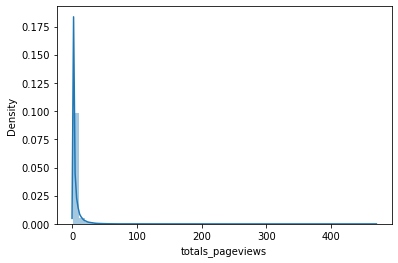

In [ ]:
sns.distplot(df['totals_pageviews'])

In [ ]:
df['totals_pageviews'].value_counts(normalize=True)*100

1      50.082508
2      15.911629
3       8.171629
4       5.001588
5       3.697735
         ...    
400     0.000111
196     0.000111
305     0.000111
154     0.000111
469     0.000111
Name: totals_pageviews, Length: 213, dtype: float64

In [ ]:
mode=df['totals_pageviews'].mode()
mode

0    1
dtype: object

In [ ]:
#df['totals_pageviews'].fillna(mode,inplace=True)
df['totals_pageviews'].fillna(1, inplace=True)

In [ ]:
df.isnull().sum()

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
sessionId                                                 0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device_browser                                            0
device_browserVersion                                     0
device_browserSize                                        0
device_operatingSystem                                    0
device_operatingSystemVersion                             0
device_isMobile                                           0
device_mobileDeviceBranding                               0
device_mobileDeviceModel                                  0
device_mobileInputSelector              

In [ ]:
df.totals_newVisits.nunique()

1

**As all Contains same values we are going to drop this variable**

In [ ]:
df=df.drop('totals_newVisits',axis=1)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/Revenue_Without_null.csv')

**Split numerical and categorical features from the dataframe**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 43 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    903653 non-null  object
 1   date                                               903653 non-null  int64 
 2   fullVisitorId                                      903653 non-null  object
 3   sessionId                                          903653 non-null  object
 4   socialEngagementType                               903653 non-null  object
 5   visitId                                            903653 non-null  int64 
 6   visitNumber                                        903653 non-null  int64 
 7   visitStartTime                                     903653 non-null  int64 
 8   device_browser                                     903653 non-null  object
 9   devi

**As pageview is numerical we are convering into numerical**

In [ ]:
df['totals_pageviews']=df['totals_pageviews'].astype(int)

In [ ]:
num=df.select_dtypes(include=np.number).columns.tolist()
cat=df.select_dtypes(include=np.object).columns.tolist()
bool=df.select_dtypes(include=np.bool).columns.tolist()

In [ ]:
df.head(2)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_adwordsClickInfo.criteriaParameters
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,0,(not set),google,organic,not available in demo dataset
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,0,(not set),google,organic,not available in demo dataset


**Handling Numerical values**

In [ ]:
for i in num:
  print('Unique Values in ',i,'is',df[i].nunique())

Unique Values in  date is 366
Unique Values in  visitId is 886303
Unique Values in  visitNumber is 384
Unique Values in  visitStartTime is 887159
Unique Values in  totals_visits is 1
Unique Values in  totals_hits is 274
Unique Values in  totals_pageviews is 213
Unique Values in  totals_transactionRevenue is 2


In [ ]:
df.totals_visits.nunique()

1

**We are dropping totals_visits as it contains only one value**

In [ ]:
df=df.drop('totals_visits',1)

**Doing Statistical Analysis between visit StartTime and visitId**

In [ ]:
df[['visitStartTime','visitId']]

,visitStartTime,visitId
0,1472830385,1472830385
1,1472880147,1472880147
2,1472865386,1472865386
3,1472881213,1472881213
4,1472822600,1472822600
...,...,...
903648,1483554750,1483554750
903649,1483543798,1483543798
903650,1483526434,1483526434
903651,1483592864,1483592857


In [ ]:
df['visitStartTime'].nunique()

887159

In [ ]:
df['visitId'].nunique()

886303

In [ ]:
mu1=df['visitStartTime'].mean()
mu1

1485007290.0595284

In [ ]:
mu2=df['visitId'].mean()
mu2

1485007289.0645623

In [ ]:
# df_visitStartTime=df['visitStartTime'].apply(lambda x: np.log(x+1))
# df_visitId=df['visitId'].apply(lambda x: np.log(x+1))

**Checking Normality Check Shapiro Test**

In [ ]:
from scipy.stats import shapiro
p_val1=shapiro(df['visitStartTime'][:5000])[1]

In [ ]:
p_val1

0.0

In [ ]:
p_val2=shapiro(df['visitId'][:5000])[1]
p_val2

0.0

In [ ]:
if p_val1<0.05:
    print('Data is not Normally Distributed')
else:
    print('Data is Normally Distributed')

Data is not Normally Distributed


In [ ]:
if p_val2<0.05:
    print('Data is not Normally Distributed')
else:
    print('Data is Normally Distributed')

Data is not Normally Distributed


In [ ]:
from scipy.stats import mannwhitneyu
p_val=mannwhitneyu(df['visitStartTime'][:5000],df['visitId'][:5000])[1]
p_val

0.4997056537232027

In [ ]:
if p_val<0.05:
    print('The mean weight of the two sample is different, accept Ha')
else:
    print('The mean weight of the two sample is same, accept Ho')

The mean weight of the two sample is same, accept Ho


**Since both Mean Weight are same hence we are dropping one variable**

In [ ]:
df.corrwith(df['totals_transactionRevenue'])

date                         0.008139
visitId                      0.010937
visitNumber                  0.022251
visitStartTime               0.010937
device_isMobile             -0.045337
totals_hits                  0.373274
totals_pageviews             0.395915
totals_transactionRevenue    1.000000
dtype: float64

In [ ]:
df=df.drop('visitId',1)

**Handling visitStartTime by epoch & unix timestamp conversion and fetching date, Month and Year columns**

In [ ]:
df.visitStartTime

0         1472830385
1         1472880147
2         1472865386
3         1472881213
4         1472822600
             ...    
903648    1483554750
903649    1483543798
903650    1483526434
903651    1483592864
903652    1483574474
Name: visitStartTime, Length: 903653, dtype: int64

In [ ]:
visit_time=[]
fmt = "%Y-%m-%d"
for i in df.visitStartTime:
     t = datetime.datetime.fromtimestamp(int(i))
     visit_time.append(t.strftime(fmt))

In [ ]:
time_df=pd.DataFrame(visit_time,columns=['Full_date'])

In [ ]:
time_df.head(2)

,Full_date
0,2016-09-02
1,2016-09-03


In [ ]:
time_df['Visit_Year']=time_df['Full_date'].str.split('-').str[0].astype(int)
time_df['Visit_Month']=time_df['Full_date'].str.split('-').str[1].astype(int)
time_df['Visit_Date']=time_df['Full_date'].str.split('-').str[2].astype(int)

In [ ]:
time_df.head()

,Full_date,Visit_Year,Visit_Month,Visit_Date
0,2016-09-02,2016,9,2
1,2016-09-03,2016,9,3
2,2016-09-03,2016,9,3
3,2016-09-03,2016,9,3
4,2016-09-02,2016,9,2


In [ ]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Full_date    903653 non-null  object
 1   Visit_Year   903653 non-null  int64 
 2   Visit_Month  903653 non-null  int64 
 3   Visit_Date   903653 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.6+ MB


In [ ]:
time_df=time_df.drop('Full_date',1)

In [ ]:
df=pd.concat([df,time_df],axis=1)

In [ ]:
df=df.drop('visitStartTime',1)

In [ ]:
df.shape

(903653, 43)

In [ ]:
df.head(2)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitNumber,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_hits,totals_pageviews,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_adwordsClickInfo.criteriaParameters,Visit_Year,Visit_Month,Visit_Date
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,0,(not set),google,organic,not available in demo dataset,2016,9,2
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,0,(not set),google,organic,not available in demo dataset,2016,9,3


**Handling Categorical values**

In [ ]:
for i in cat:
  print('Unique Values in ',i,'is',df[i].nunique())

Unique Values in  channelGrouping is 8
Unique Values in  fullVisitorId is 742735
Unique Values in  sessionId is 902755
Unique Values in  socialEngagementType is 1
Unique Values in  device_browser is 54
Unique Values in  device_browserVersion is 1
Unique Values in  device_browserSize is 1
Unique Values in  device_operatingSystem is 20
Unique Values in  device_operatingSystemVersion is 1
Unique Values in  device_mobileDeviceBranding is 1
Unique Values in  device_mobileDeviceModel is 1
Unique Values in  device_mobileInputSelector is 1
Unique Values in  device_mobileDeviceInfo is 1
Unique Values in  device_mobileDeviceMarketingName is 1
Unique Values in  device_flashVersion is 1
Unique Values in  device_language is 1
Unique Values in  device_screenColors is 1
Unique Values in  device_screenResolution is 1
Unique Values in  device_deviceCategory is 3
Unique Values in  geoNetwork_continent is 6
Unique Values in  geoNetwork_subContinent is 23
Unique Values in  geoNetwork_country is 222
Unique

**Dropping Categorical features which is having less than 10 unique values**

In [ ]:
for i in cat:
  if df[i].nunique()<=10:
    df=df.drop(i,axis=1)

In [ ]:
cat1=df.select_dtypes(include=np.object).columns.tolist()
for i in cat1:
  print('Unique Values in ',i,'is',df[i].nunique())

Unique Values in  fullVisitorId is 742735
Unique Values in  sessionId is 902755
Unique Values in  device_browser is 54
Unique Values in  device_operatingSystem is 20
Unique Values in  geoNetwork_subContinent is 23
Unique Values in  geoNetwork_country is 222
Unique Values in  geoNetwork_region is 376
Unique Values in  geoNetwork_metro is 94
Unique Values in  geoNetwork_city is 649
Unique Values in  geoNetwork_networkDomain is 28064
Unique Values in  trafficSource_source is 380


**sessionId contains lots of Unique values so we can drop it**

In [ ]:
df=df.drop('sessionId',axis=1)

In [ ]:
df.head(2)

,date,fullVisitorId,visitNumber,device_browser,device_operatingSystem,device_isMobile,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,totals_hits,totals_pageviews,totals_transactionRevenue,trafficSource_source,Visit_Year,Visit_Month,Visit_Date
0,20160902,1131660440785968503,1,Chrome,Windows,False,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,0,google,2016,9,2
1,20160902,377306020877927890,1,Firefox,Macintosh,False,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,0,google,2016,9,3


In [ ]:
df.shape

(903653, 19)

**Handling date by epoch & unix timestamp conversion and fetching date, Month and Year columns but Year Month and date contains only same values so we are fetching Hrs, mins and secs** 

In [ ]:
date=[]
fmt = "%H:%M:%S"
for i in df.date:
     t = datetime.datetime.fromtimestamp(int(i))
     date.append(t.strftime(fmt))

In [ ]:
date_df=pd.DataFrame(date,columns=['Full_date'])

In [ ]:
date_df.head(3)

,Full_date
0,08:15:02
1,08:15:02
2,08:15:02


In [ ]:
date_df['Hours']=date_df['Full_date'].str.split(':').str[0].astype(int)
date_df['Minutes']=date_df['Full_date'].str.split(':').str[1].astype(int)
date_df['Seconds']=date_df['Full_date'].str.split(':').str[2].astype(int)

In [ ]:
date_df=date_df.drop('Full_date',1)

In [ ]:
df=pd.concat([df,date_df],axis=1)

In [ ]:
df=df.drop('date',1)

In [ ]:
df1=df.copy()

In [ ]:
df=df1.copy()

**Handling Categorical values**

In [ ]:
cat2=df.select_dtypes(include=np.object).columns.tolist()
for i in cat2:
  print('Unique Values in ',i,'is',df[i].nunique())

Unique Values in  fullVisitorId is 742735
Unique Values in  device_browser is 54
Unique Values in  device_operatingSystem is 20
Unique Values in  geoNetwork_subContinent is 23
Unique Values in  geoNetwork_country is 222
Unique Values in  geoNetwork_region is 376
Unique Values in  geoNetwork_metro is 94
Unique Values in  geoNetwork_city is 649
Unique Values in  geoNetwork_networkDomain is 28064
Unique Values in  trafficSource_source is 380


In [ ]:
df.geoNetwork_networkDomain.value_counts()

(not set)           244881
unknown.unknown     146034
comcast.net          28743
rr.com               14827
verizon.net          13637
                     ...  
co.co.za                 1
huskyenergy.com          1
pulsation.fr             1
asmeg.org                1
birlasunlife.com         1
Name: geoNetwork_networkDomain, Length: 28064, dtype: int64

In [ ]:
# df[df['geoNetwork_networkDomain']=='(not set)']='Missing'
# df[df['geoNetwork_networkDomain']=='unknown.unknown']='Missing'

df["geoNetwork_networkDomain"].replace({"(not set)": "Missing", "unknown.unknown": "Missing"}, inplace=True)

In [ ]:
df.geoNetwork_networkDomain.value_counts()

Missing             390915
comcast.net          28743
rr.com               14827
verizon.net          13637
ttnet.com.tr         13228
                     ...  
co.co.za                 1
huskyenergy.com          1
pulsation.fr             1
asmeg.org                1
redemptio.edu.ec         1
Name: geoNetwork_networkDomain, Length: 28063, dtype: int64

In [ ]:
df.geoNetwork_networkDomain.value_counts(normalize=True)*100

Missing             43.259415
comcast.net          3.180756
rr.com               1.640785
verizon.net          1.509097
ttnet.com.tr         1.463836
                      ...    
co.co.za             0.000111
huskyenergy.com      0.000111
pulsation.fr         0.000111
asmeg.org            0.000111
redemptio.edu.ec     0.000111
Name: geoNetwork_networkDomain, Length: 28063, dtype: float64

In [ ]:
df.geoNetwork_subContinent.value_counts(normalize=True)*100

Northern America      43.230864
Southeast Asia         8.609499
Southern Asia          6.564577
Western Europe         6.541670
Northern Europe        6.436984
Eastern Asia           5.192148
Eastern Europe         5.007342
South America          4.618034
Western Asia           4.254177
Southern Europe        3.959484
Central America        1.724445
Australasia            1.648088
Northern Africa        0.850216
Western Africa         0.284733
Caribbean              0.266253
Southern Africa        0.240026
Eastern Africa         0.213246
(not set)              0.162452
Central Asia           0.134454
Middle Africa          0.043490
Melanesia              0.008964
Micronesian Region     0.006086
Polynesia              0.002767
Name: geoNetwork_subContinent, dtype: float64

In [ ]:
df.geoNetwork_region.value_counts(normalize=True)*100

not available in demo dataset    56.241610
California                       11.895606
(not set)                         3.079390
New York                          2.925127
England                           1.460516
                                   ...    
Bremen                            0.000664
Oran Province                     0.000664
Kumamoto Prefecture               0.000553
San Salvador Department           0.000553
Montana                           0.000332
Name: geoNetwork_region, Length: 376, dtype: float64

In [ ]:
df.geoNetwork_metro.value_counts(normalize=True)*100

not available in demo dataset        56.241610
(not set)                            22.327818
San Francisco-Oakland-San Jose CA    10.613919
New York NY                           2.978688
London                                1.391131
                                       ...    
Providence-New Bedford,MA             0.000664
Chattanooga TN                        0.000664
Tallahassee FL-Thomasville GA         0.000664
Butte-Bozeman MT                      0.000332
Boise ID                              0.000332
Name: geoNetwork_metro, Length: 94, dtype: float64

In [ ]:
df.geoNetwork_city.value_counts(normalize=True)*100

not available in demo dataset    56.241610
Mountain View                     4.524303
(not set)                         3.791500
New York                          2.918266
San Francisco                     2.249647
                                   ...    
Campbell                          0.000553
Douglasville                      0.000553
Daly City                         0.000443
Boise                             0.000332
Bozeman                           0.000332
Name: geoNetwork_city, Length: 649, dtype: float64

**Dropping [ 'geoNetwork_region' , 'geoNetwork_metro' , 'geoNetwork_city' ] these Features as they contain almost 50% of Missing values**

In [ ]:
df=df.drop(['geoNetwork_region','geoNetwork_metro','geoNetwork_city'],1)

**Frequency Encoding**

In [ ]:
# Handling geoNetwork_country, trafficSource_source, geoNetwork_networkDomain, device_browser

In [ ]:
df.geoNetwork_country.value_counts(normalize=True)*100

United States          40.363281
India                   5.659252
United Kingdom          4.137982
Canada                  2.862714
Vietnam                 2.722063
                         ...    
Anguilla                0.000111
St. Barthélemy          0.000111
American Samoa          0.000111
São Tomé & Príncipe     0.000111
Åland Islands           0.000111
Name: geoNetwork_country, Length: 222, dtype: float64

In [ ]:
df.trafficSource_source.value_counts(normalize=True)*100

google                                               44.351980
youtube.com                                          23.526951
(direct)                                             15.827757
mall.googleplex.com                                   7.349724
Partners                                              1.816073
                                                       ...    
it-mg42.mail.yahoo.com                                0.000111
tweetdeck.twitter.com                                 0.000111
ps-dm.reddit.com                                      0.000111
0.shared.bow.cat2.ads-bow.qk.borg.google.com:9834     0.000111
mobile.facebook.com                                   0.000111
Name: trafficSource_source, Length: 380, dtype: float64

In [ ]:
df.columns

Index(['fullVisitorId', 'visitNumber', 'device_browser',
       'device_operatingSystem', 'device_isMobile', 'geoNetwork_subContinent',
       'geoNetwork_country', 'geoNetwork_networkDomain', 'totals_hits',
       'totals_pageviews', 'totals_transactionRevenue', 'trafficSource_source',
       'Visit_Year', 'Visit_Month', 'Visit_Date', 'Hours', 'Minutes',
       'Seconds'],
      dtype='object')

In [ ]:
# trafficSource_source
traffix_src=df.groupby('trafficSource_source')['totals_transactionRevenue'].sum()
traffix_src

trafficSource_source
(direct)                                                        2042
(not set)                                                          0
0.muppet1.frontend.gws.muppet-exp.ij-q.borg.google.com:14634       0
0.shared.bow.cat2.ads-bow.lf.borg.google.com:9817                  0
0.shared.bow.cat2.ads-bow.lf.borg.google.com:9824                  0
                                                                ... 
yahoo                                                             22
yahoo.com                                                          0
yandex                                                             0
youtube.com                                                       11
yt-go-12345.googleplex.com                                         0
Name: totals_transactionRevenue, Length: 380, dtype: int64

In [ ]:
df['trafficSource_source']=df['trafficSource_source'].map(traffix_src)

In [ ]:
df.trafficSource_source.value_counts(normalize=True)*100

3879    44.351980
11      23.526951
2042    15.827757
5103     7.349724
0        3.048958
9        1.816073
123      0.629224
6        0.629003
5        0.574667
1        0.544346
42       0.330105
20       0.254080
21       0.169313
7        0.169202
22       0.163780
62       0.161234
18       0.117634
38       0.113428
13       0.087976
40       0.058430
4        0.054114
2        0.011288
3        0.010734
Name: trafficSource_source, dtype: float64

In [ ]:
# geoNetwork_country
geo_country=df.groupby('geoNetwork_country')['totals_transactionRevenue'].sum()
geo_country.values

array([    6,     0,     0,     0,     0,     0,     0,     1,     0,
           5,     1,     0,    13,     0,     0,     0,     0,     0,
           0,     0,     5,     0,     0,     0,     0,     0,     0,
           0,    10,     0,     0,     0,     0,     0,     0,     0,
         190,     0,     0,     0,     0,     0,     5,     6,     8,
           0,     0,     0,     0,     0,     0,     1,     1,     1,
           0,     1,     0,     0,     0,     4,     1,     1,     0,
           0,     0,     0,     0,     0,     2,     5,     0,     0,
           0,     0,     2,     8,     0,     0,     3,     0,     0,
           1,     0,     2,     0,     0,     0,     0,     0,     0,
           9,     1,     0,    10,    11,     0,     0,     6,     0,
           6,     2,     0,    17,     0,     0,     2,     3,     0,
           2,     0,     0,     0,     1,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     3,     0,     0,
           0,     0,

In [ ]:
df['geoNetwork_country']=df['geoNetwork_country'].map(geo_country)

In [ ]:
df.geoNetwork_country.value_counts(normalize=True)*100

10953    40.363281
10        8.642145
0         7.178972
2         6.898112
5         5.243606
3         5.228334
16        4.137982
8         3.330593
1         3.296619
190       2.862714
17        2.183471
4         2.046139
6         1.926071
20        1.463504
19        1.438163
13        1.405185
11        1.107173
9         1.012004
63        0.235931
Name: geoNetwork_country, dtype: float64

In [ ]:
# geoNetwork_networkDomain
geo_domain=df.groupby('geoNetwork_networkDomain')['totals_transactionRevenue'].sum()
geo_domain.values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df['geoNetwork_networkDomain']=df['geoNetwork_networkDomain'].map(geo_domain)

In [ ]:
df.geoNetwork_networkDomain.value_counts(normalize=True)*100

7045    43.259415
0       26.401395
1        8.495296
2        3.708392
934      3.180756
3        1.747905
364      1.640785
469      1.509097
11       1.187403
294      1.104960
22       0.758256
156      0.643167
150      0.596247
45       0.578762
133      0.550211
4        0.400264
88       0.391079
50       0.314833
65       0.293365
13       0.283184
9        0.268798
5        0.243678
40       0.238145
52       0.180711
16       0.173961
30       0.163005
15       0.159464
68       0.158579
21       0.151939
24       0.142311
18       0.141869
12       0.140319
6        0.136004
7        0.134897
33       0.127483
8        0.115199
34       0.089636
27       0.066065
29       0.064405
10       0.058761
Name: geoNetwork_networkDomain, dtype: float64

In [ ]:
# device_browser
dev_browser=df.groupby('device_browser')['totals_transactionRevenue'].sum()
dev_browser

device_browser
(not set)                                          0
0                                                  0
ADM                                                0
Amazon Silk                                        1
Android Browser                                    0
Android Runtime                                    0
Android Webview                                    6
Apple-iPhone7C2                                    0
BlackBerry                                         0
CSM Click                                          0
Changa 99695759                                    0
Chrome                                         10353
Coc Coc                                            0
DASH_JR_3G                                         0
DoCoMo                                             0
Edge                                              58
Firefox                                          191
HTC802t_TD                                         0
Hisense M20-M_LTE              

In [ ]:
df['device_browser']=df['device_browser'].map(dev_browser)

In [ ]:
df.device_browser.value_counts(normalize=True)*100

10353    68.650688
780      20.167586
191       4.102128
109       2.144075
0         1.491280
58        1.129305
6         0.870356
12        0.758034
5         0.624465
1         0.062081
Name: device_browser, dtype: float64

**Mapping geoNetwork_subContinent with 7 Continents { Africa, Antarctica, Asia, Australia/Oceania, Europe, North America, and South America }**



In [ ]:
df.geoNetwork_subContinent.value_counts(normalize=True)*100

Northern America      43.230864
Southeast Asia         8.609499
Southern Asia          6.564577
Western Europe         6.541670
Northern Europe        6.436984
Eastern Asia           5.192148
Eastern Europe         5.007342
South America          4.618034
Western Asia           4.254177
Southern Europe        3.959484
Central America        1.724445
Australasia            1.648088
Northern Africa        0.850216
Western Africa         0.284733
Caribbean              0.266253
Southern Africa        0.240026
Eastern Africa         0.213246
(not set)              0.162452
Central Asia           0.134454
Middle Africa          0.043490
Melanesia              0.008964
Micronesian Region     0.006086
Polynesia              0.002767
Name: geoNetwork_subContinent, dtype: float64

In [ ]:
df["geoNetwork_subContinent"]=df["geoNetwork_subContinent"].str.replace(r'(^.*Asia.*$)', "Asia")
df["geoNetwork_subContinent"]=df["geoNetwork_subContinent"].str.replace(r'(^.*Europe.*$)', "Europe")
df["geoNetwork_subContinent"]=df["geoNetwork_subContinent"].str.replace(r'(^.*Australasia.*$)', "Australia")
df["geoNetwork_subContinent"]=df["geoNetwork_subContinent"].str.replace(r'(^.*Africa.*$)', "Africa")
df["geoNetwork_subContinent"]=df["geoNetwork_subContinent"].str.replace(r'(^.*Melanesia.*$)', "Pacific")
df["geoNetwork_subContinent"]=df["geoNetwork_subContinent"].str.replace(r'(^.*Micronesian.*$)', "Pacific")
df["geoNetwork_subContinent"]=df["geoNetwork_subContinent"].str.replace(r'(^.*Polynesia.*$)', "Pacific")
df["geoNetwork_subContinent"]=df["geoNetwork_subContinent"].str.replace(r'(^.*Caribbean.*$)', "South America")

In [ ]:
df["geoNetwork_subContinent"]

0                    Asia
1               Australia
2                  Europe
3                    Asia
4                  Europe
               ...       
903648      South America
903649               Asia
903650               Asia
903651               Asia
903652    Central America
Name: geoNetwork_subContinent, Length: 903653, dtype: object

In [ ]:
df["geoNetwork_subContinent"].value_counts(normalize=True)

Northern America    0.432309
Asia                0.247549
Europe              0.219455
South America       0.048843
Central America     0.017244
Australia           0.016481
Africa              0.016317
(not set)           0.001625
Pacific             0.000178
Name: geoNetwork_subContinent, dtype: float64

In [ ]:
df = df[df.geoNetwork_subContinent != '(not set)']

In [ ]:
df["geoNetwork_subContinent"].value_counts(normalize=True)

Northern America    0.433012
Asia                0.247951
Europe              0.219812
South America       0.048922
Central America     0.017273
Australia           0.016508
Africa              0.016344
Pacific             0.000178
Name: geoNetwork_subContinent, dtype: float64

In [ ]:
df.Visit_Year.nunique()

2

In [ ]:
df.Visit_Month.nunique()

12

In [ ]:
df.Visit_Date.nunique()

31

In [ ]:
df.Hours.nunique()

3

In [ ]:
df.Minutes.nunique()

16

In [ ]:
df.Seconds.nunique()

60

**Handling geoNetwork_networkDomain by Binary Encoding**




In [ ]:
# print('Feature device_operatingSystem has ',df.device_operatingSystem.nunique(),' Unique Values')
# print('Feature geoNetwork_subContinent has ',df.geoNetwork_subContinent.nunique(),' Unique Values')
# print('Feature device_isMobile has ',df.device_isMobile.nunique(),' Unique Values')

In [ ]:
# pip install --upgrade category_encoders

In [ ]:
# import category_encoders as ce

In [ ]:
# encoder= ce.BinaryEncoder(cols=['geoNetwork_networkDomain'])

In [ ]:
# df=encoder.fit_transform(df) 
# df

In [ ]:
#df.geoNetwork_networkDomain.value_counts()

In [ ]:
df_fullVisitorId=df.fullVisitorId

In [ ]:
df=df.drop('fullVisitorId',1)

In [ ]:
df

,visitNumber,device_browser,device_operatingSystem,device_isMobile,geoNetwork_subContinent,geoNetwork_country,geoNetwork_networkDomain,totals_hits,totals_pageviews,totals_transactionRevenue,trafficSource_source,Visit_Year,Visit_Month,Visit_Date,Hours,Minutes,Seconds
0,1,10353,Windows,False,Asia,2,1,1,1,0,3879,2016,9,2,8,15,2
1,1,191,Macintosh,False,Australia,13,1,1,1,0,3879,2016,9,3,8,15,2
2,1,10353,Windows,False,Europe,2,7045,1,1,0,3879,2016,9,3,8,15,2
3,1,0,Linux,False,Asia,11,7045,1,1,0,3879,2016,9,3,8,15,2
4,2,10353,Android,True,Europe,16,7045,1,1,0,3879,2016,9,2,8,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,1,10353,Windows,False,South America,11,4,17,15,0,11,2017,1,4,10,48,24
903649,1,10353,Android,True,Asia,0,7045,18,13,0,11,2017,1,4,10,48,24
903650,1,6,Android,True,Asia,8,7045,24,21,0,11,2017,1,4,10,48,24
903651,1,10353,Windows,False,Asia,11,7045,24,22,0,20,2017,1,5,10,48,24


In [ ]:
df.select_dtypes(include=np.object)

,device_operatingSystem,geoNetwork_subContinent
0,Windows,Asia
1,Macintosh,Australia
2,Windows,Europe
3,Linux,Asia
4,Android,Europe
...,...,...
903648,Windows,South America
903649,Android,Asia
903650,Android,Asia
903651,Windows,Asia


**Doing OHE with the Remaining Categorical Columns**

In [ ]:
# print(df.geoNetwork_networkDomain.nunique())
print('Feature device_operatingSystem has ',df.device_operatingSystem.nunique(),' Unique Values')
print('Feature geoNetwork_subContinent has ',df.geoNetwork_subContinent.nunique(),' Unique Values')
print('Feature device_isMobile has ',df.device_isMobile.nunique(),' Unique Values')

Feature device_operatingSystem has  20  Unique Values
Feature geoNetwork_subContinent has  8  Unique Values
Feature device_isMobile has  2  Unique Values


In [ ]:
ohe_df=pd.get_dummies(df[['device_operatingSystem','geoNetwork_subContinent','device_isMobile']],drop_first=True)

In [ ]:
ohe_df

,device_isMobile,device_operatingSystem_Android,device_operatingSystem_BlackBerry,device_operatingSystem_Chrome OS,device_operatingSystem_Firefox OS,device_operatingSystem_FreeBSD,device_operatingSystem_Linux,device_operatingSystem_Macintosh,device_operatingSystem_NTT DoCoMo,device_operatingSystem_Nintendo 3DS,device_operatingSystem_Nintendo Wii,device_operatingSystem_Nintendo WiiU,device_operatingSystem_Nokia,device_operatingSystem_OpenBSD,device_operatingSystem_Samsung,device_operatingSystem_SunOS,device_operatingSystem_Windows,device_operatingSystem_Windows Phone,device_operatingSystem_Xbox,device_operatingSystem_iOS,geoNetwork_subContinent_Asia,geoNetwork_subContinent_Australia,geoNetwork_subContinent_Central America,geoNetwork_subContinent_Europe,geoNetwork_subContinent_Northern America,geoNetwork_subContinent_Pacific,geoNetwork_subContinent_South America
0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
903649,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
903650,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
903651,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
df=pd.concat([df,ohe_df],1)

In [ ]:
df

,visitNumber,device_browser,device_operatingSystem,device_isMobile,geoNetwork_subContinent,geoNetwork_country,geoNetwork_networkDomain,totals_hits,totals_pageviews,totals_transactionRevenue,trafficSource_source,Visit_Year,Visit_Month,Visit_Date,Hours,Minutes,Seconds,device_isMobile,device_operatingSystem_Android,device_operatingSystem_BlackBerry,device_operatingSystem_Chrome OS,device_operatingSystem_Firefox OS,device_operatingSystem_FreeBSD,device_operatingSystem_Linux,device_operatingSystem_Macintosh,device_operatingSystem_NTT DoCoMo,device_operatingSystem_Nintendo 3DS,device_operatingSystem_Nintendo Wii,device_operatingSystem_Nintendo WiiU,device_operatingSystem_Nokia,device_operatingSystem_OpenBSD,device_operatingSystem_Samsung,device_operatingSystem_SunOS,device_operatingSystem_Windows,device_operatingSystem_Windows Phone,device_operatingSystem_Xbox,device_operatingSystem_iOS,geoNetwork_subContinent_Asia,geoNetwork_subContinent_Australia,geoNetwork_subContinent_Central America,geoNetwork_subContinent_Europe,geoNetwork_subContinent_Northern America,geoNetwork_subContinent_Pacific,geoNetwork_subContinent_South America
0,1,10353,Windows,False,Asia,2,1,1,1,0,3879,2016,9,2,8,15,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,1,191,Macintosh,False,Australia,13,1,1,1,0,3879,2016,9,3,8,15,2,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,10353,Windows,False,Europe,2,7045,1,1,0,3879,2016,9,3,8,15,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,0,Linux,False,Asia,11,7045,1,1,0,3879,2016,9,3,8,15,2,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2,10353,Android,True,Europe,16,7045,1,1,0,3879,2016,9,2,8,15,2,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,1,10353,Windows,False,South America,11,4,17,15,0,11,2017,1,4,10,48,24,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
903649,1,10353,Android,True,Asia,0,7045,18,13,0,11,2017,1,4,10,48,24,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
903650,1,6,Android,True,Asia,8,7045,24,21,0,11,2017,1,4,10,48,24,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
903651,1,10353,Windows,False,Asia,11,7045,24,22,0,20,2017,1,5,10,48,24,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
df=df.drop(['device_browser','device_operatingSystem','geoNetwork_subContinent','device_isMobile'],1)

In [ ]:
df

,visitNumber,geoNetwork_country,geoNetwork_networkDomain,totals_hits,totals_pageviews,totals_transactionRevenue,trafficSource_source,Visit_Year,Visit_Month,Visit_Date,Hours,Minutes,Seconds,device_operatingSystem_Android,device_operatingSystem_BlackBerry,device_operatingSystem_Chrome OS,device_operatingSystem_Firefox OS,device_operatingSystem_FreeBSD,device_operatingSystem_Linux,device_operatingSystem_Macintosh,device_operatingSystem_NTT DoCoMo,device_operatingSystem_Nintendo 3DS,device_operatingSystem_Nintendo Wii,device_operatingSystem_Nintendo WiiU,device_operatingSystem_Nokia,device_operatingSystem_OpenBSD,device_operatingSystem_Samsung,device_operatingSystem_SunOS,device_operatingSystem_Windows,device_operatingSystem_Windows Phone,device_operatingSystem_Xbox,device_operatingSystem_iOS,geoNetwork_subContinent_Asia,geoNetwork_subContinent_Australia,geoNetwork_subContinent_Central America,geoNetwork_subContinent_Europe,geoNetwork_subContinent_Northern America,geoNetwork_subContinent_Pacific,geoNetwork_subContinent_South America
0,1,2,1,1,1,0,3879,2016,9,2,8,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,1,13,1,1,1,0,3879,2016,9,3,8,15,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,2,7045,1,1,0,3879,2016,9,3,8,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,11,7045,1,1,0,3879,2016,9,3,8,15,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2,16,7045,1,1,0,3879,2016,9,2,8,15,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,1,11,4,17,15,0,11,2017,1,4,10,48,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
903649,1,0,7045,18,13,0,11,2017,1,4,10,48,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
903650,1,8,7045,24,21,0,11,2017,1,4,10,48,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
903651,1,11,7045,24,22,0,20,2017,1,5,10,48,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
bool

['device_isMobile']

**Checking Outliers**

In [ ]:
df.columns

Index(['visitNumber', 'geoNetwork_country', 'geoNetwork_networkDomain',
       'totals_hits', 'totals_pageviews', 'totals_transactionRevenue',
       'trafficSource_source', 'Visit_Year', 'Visit_Month', 'Visit_Date',
       'Hours', 'Minutes', 'Seconds', 'device_operatingSystem_Android',
       'device_operatingSystem_BlackBerry', 'device_operatingSystem_Chrome OS',
       'device_operatingSystem_Firefox OS', 'device_operatingSystem_FreeBSD',
       'device_operatingSystem_Linux', 'device_operatingSystem_Macintosh',
       'device_operatingSystem_NTT DoCoMo',
       'device_operatingSystem_Nintendo 3DS',
       'device_operatingSystem_Nintendo Wii',
       'device_operatingSystem_Nintendo WiiU', 'device_operatingSystem_Nokia',
       'device_operatingSystem_OpenBSD', 'device_operatingSystem_Samsung',
       'device_operatingSystem_SunOS', 'device_operatingSystem_Windows',
       'device_operatingSystem_Windows Phone', 'device_operatingSystem_Xbox',
       'device_operatingSystem_iOS', 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902185 entries, 0 to 903652
Data columns (total 39 columns):
 #   Column                                    Non-Null Count   Dtype
---  ------                                    --------------   -----
 0   visitNumber                               902185 non-null  int64
 1   geoNetwork_country                        902185 non-null  int64
 2   geoNetwork_networkDomain                  902185 non-null  int64
 3   totals_hits                               902185 non-null  int64
 4   totals_pageviews                          902185 non-null  int64
 5   totals_transactionRevenue                 902185 non-null  int64
 6   trafficSource_source                      902185 non-null  int64
 7   Visit_Year                                902185 non-null  int64
 8   Visit_Month                               902185 non-null  int64
 9   Visit_Date                                902185 non-null  int64
 10  Hours                                     90

In [ ]:
df.dtypes.value_counts()

uint8    26
int64    13
dtype: int64

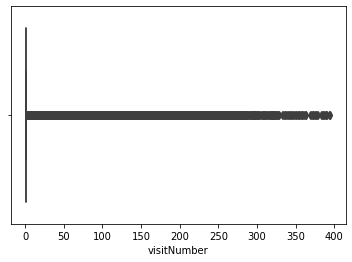

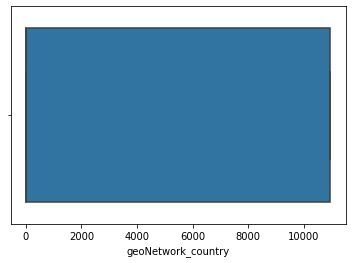

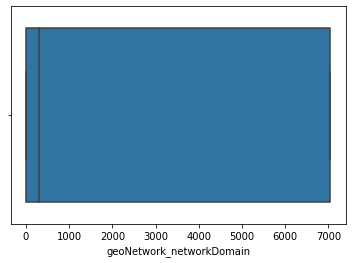

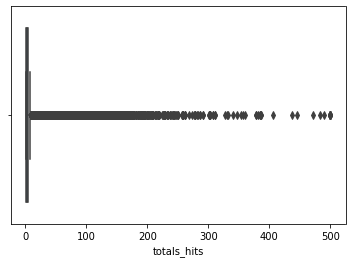

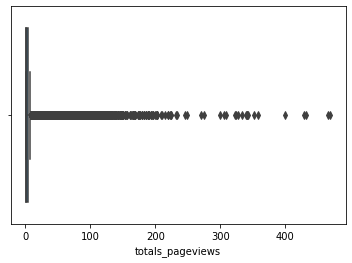

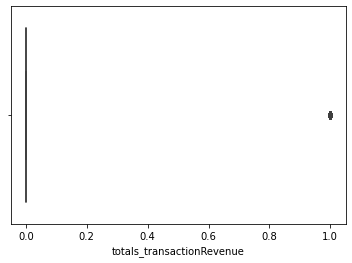

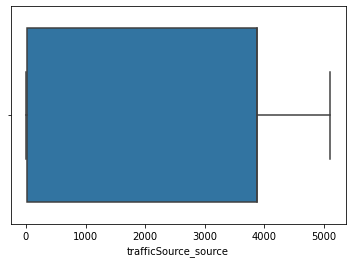

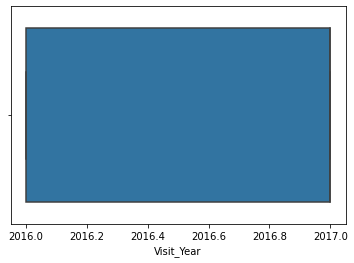

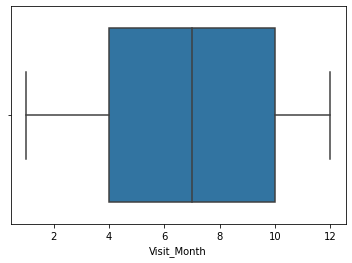

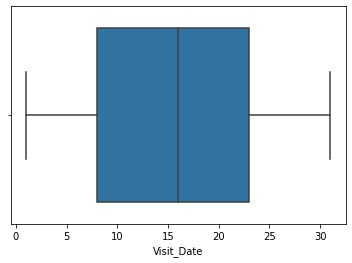

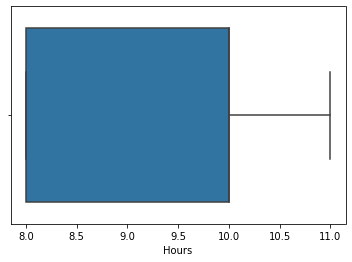

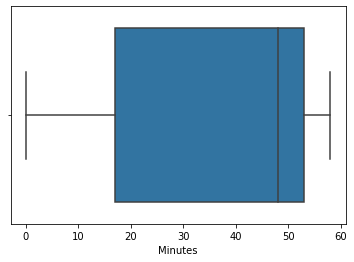

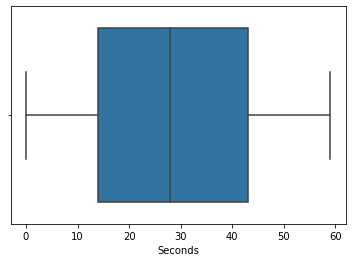

In [ ]:
for i in df.columns:
  if df[i].dtypes=='int64':
    sns.boxplot(df[i])
    plt.show()

**These Three columns have OUTLIERS [ visitNumber , totals_hits, totals_page_views ]**

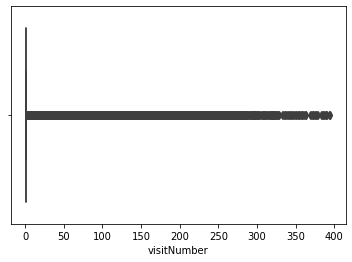

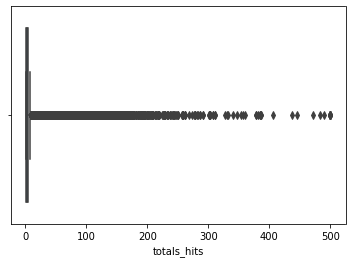

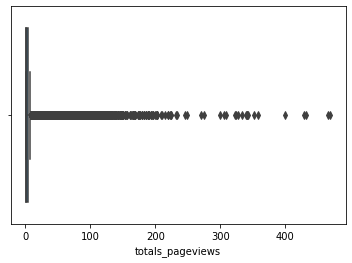

In [ ]:
outliers=['visitNumber', 'totals_hits', 'totals_pageviews']
for i in outliers:
  sns.boxplot(df[i])
  plt.show()

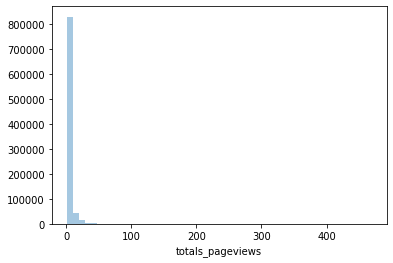

In [ ]:
sns.distplot(df.totals_pageviews,kde=False)

**Doing Power Transformation for outliers Data**

In [ ]:
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer()
# pt.fit([df.totals_pageviews])

In [ ]:
# pt_df=pt.transform([df.totals_pageviews])

In [ ]:
# sns.distplot(pt_df)

In [ ]:
# sns.boxplot(pt_df)

**Log Transformation**

In [ ]:
outliers=['visitNumber', 'totals_hits', 'totals_pageviews']


log_visit_no=df.visitNumber.apply(lambda x:np.log(x))
log_tot_hits=df.totals_hits.apply(lambda x:np.log(x))
log_tot_views=df.totals_pageviews.apply(lambda x:np.log(x))

Skewness :  1.17948030444516


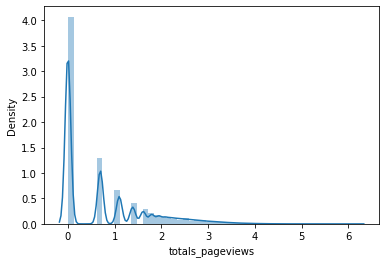

In [ ]:
sns.distplot(log_tot_views)
print('Skewness : ',log_tot_views.skew())

Skewness :  1.205645173942367


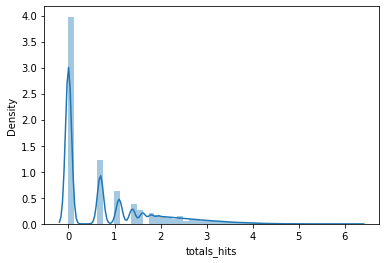

In [ ]:
sns.distplot(log_tot_hits)
print('Skewness : ',log_tot_hits.skew())

Skewness :  3.173516602856689


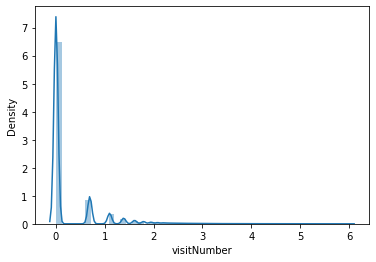

In [ ]:
sns.distplot(log_visit_no)
print('Skewness : ',log_visit_no.skew())

**BoxCox Transformation**

In [ ]:
import scipy.stats as stats
trans1,lam=stats.boxcox(df['visitNumber'])
trans2,lam=stats.boxcox(df['totals_hits'])
trans3,lam=stats.boxcox(df['totals_pageviews'])

Skewness :  [1.35269647]


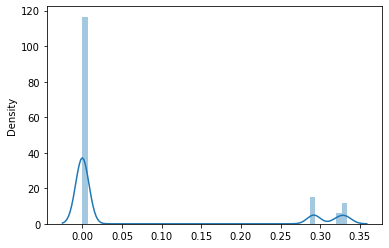

In [ ]:
sns.distplot(trans1)
print('Skewness : ',pd.DataFrame(trans1).skew().values)
plt.show()

Skewness :  [0.40007297]


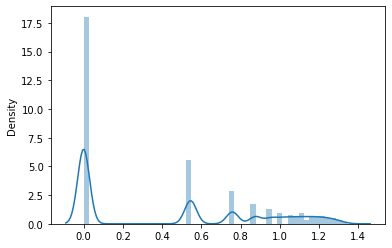

In [ ]:
sns.distplot(trans2)
print('Skewness : ',pd.DataFrame(trans2).skew().values)
plt.show()

Skewness :  [0.39311631]


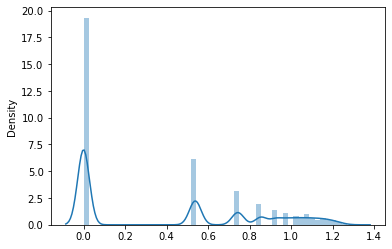

In [ ]:
sns.distplot(trans3)
print('Skewness : ',pd.DataFrame(trans3).skew().values)
plt.show()

**BOXCOX Transformation is performing better than LOG Transformation**

**Creating Trans DataFrame to append all BoxCox Transformed Features**

In [ ]:
trans=pd.DataFrame(trans1,columns=['visitNumber'])

In [ ]:
#trans['visitNumber']=pd.DataFrame(trans1)
trans['totals_hits']=pd.DataFrame(trans2)
trans['totals_pageviews']=pd.DataFrame(trans3)

In [ ]:
trans.reset_index(drop=True, inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
trans.head()

,visitNumber,totals_hits,totals_pageviews
0,0.000000,0.0,0.0
1,0.000000,0.0,0.0
2,0.000000,0.0,0.0
3,0.000000,0.0,0.0
4,0.291838,0.0,0.0


In [ ]:
trans

,visitNumber,totals_hits,totals_pageviews
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.291838,0.000000,0.000000
...,...,...,...
902180,0.000000,1.206281,1.142063
902181,0.000000,1.213527,1.123033
902182,0.000000,1.245787,1.179388
902183,0.000000,1.245787,1.183833


In [ ]:
df=df.drop(['visitNumber','totals_hits','totals_pageviews'],1)

**Concating Tranformed features with the Dataframe**

In [ ]:
df=pd.concat([df,trans],axis=1)

**Base Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
x=df.drop('totals_transactionRevenue',1)
y=df['totals_transactionRevenue']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)

In [ ]:
mod_logit=LogisticRegression(max_iter=2000)
mod_logit.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# dt=DecisionTreeClassifier()
# dt.fit(x_train,y_train)

In [ ]:
# y_pred=dt.predict(x_test)
y_pred=mod_logit.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    267203
           1       0.52      0.14      0.22      3453

    accuracy                           0.99    270656
   macro avg       0.76      0.57      0.61    270656
weighted avg       0.98      0.99      0.98    270656



In [ ]:
print('       Actual       ')
print('    ',0,'     ',1)
print(confusion_matrix(y_test,y_pred))

       Actual       
     0       1
[[266758    445]
 [  2968    485]]


In [ ]:
485/(485+2968)

0.140457573124819

**Feature Importance**

In [ ]:
# Checking Feature Importance Using Decision tree

In [ ]:
x=df.drop('totals_transactionRevenue',1)
y=df['totals_transactionRevenue']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    267203
           1       0.35      0.37      0.36      3453

    accuracy                           0.98    270656
   macro avg       0.67      0.68      0.67    270656
weighted avg       0.98      0.98      0.98    270656



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[264776   2427]
 [  2169   1284]]


In [ ]:
# pd.Series(dt.feature_importances_, index=x_train.columns).plot(kind='barh')

In [ ]:
# nlargest is used only for Series
# pd.DataFrame(feat_importances,index=x_test.columns).plot(kind='barh')

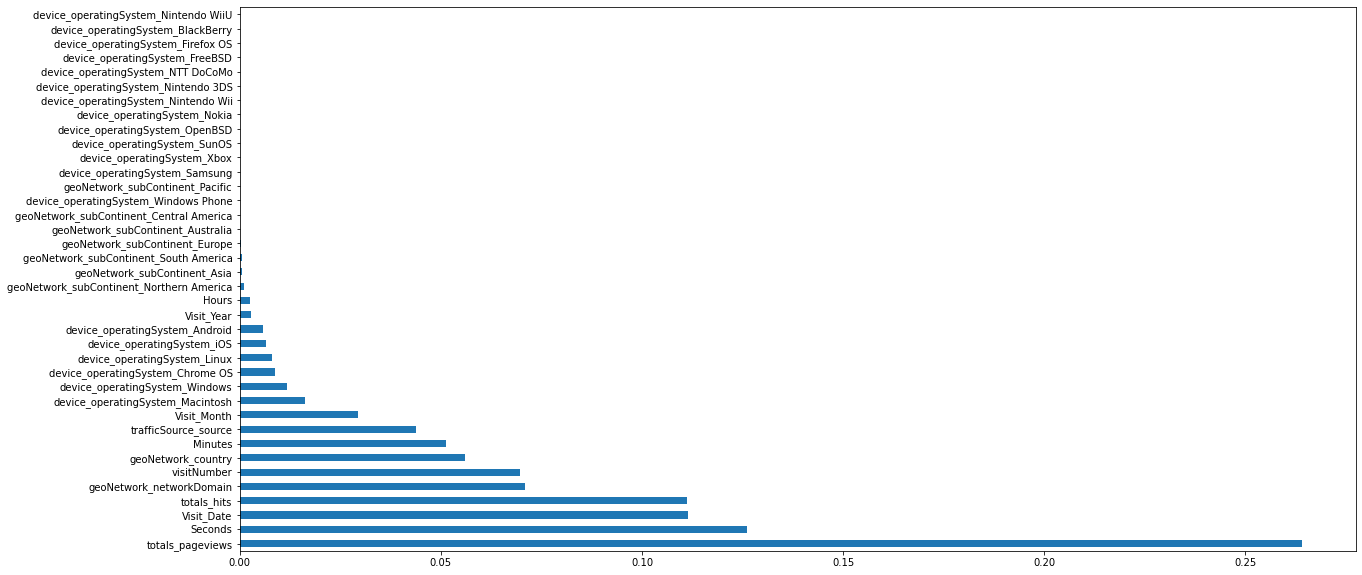

In [ ]:
#feat_importances.plot(kind='barh')

plt.figure(figsize=(20,10))
(pd.Series(dt.feature_importances_, index=x_train.columns)
   .nlargest(50)
   .plot(kind='barh'))

In [ ]:
pd.Series(dt.feature_importances_, index=x_train.columns).nlargest(18).index

Index(['totals_pageviews', 'Seconds', 'Visit_Date', 'totals_hits',
       'geoNetwork_networkDomain', 'visitNumber', 'geoNetwork_country',
       'Minutes', 'trafficSource_source', 'Visit_Month',
       'device_operatingSystem_Macintosh', 'device_operatingSystem_Windows',
       'device_operatingSystem_Chrome OS', 'device_operatingSystem_Linux',
       'device_operatingSystem_iOS', 'device_operatingSystem_Android',
       'Visit_Year', 'Hours'],
      dtype='object')

#  Checking Mullticollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['feature']=df.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
0,7.671361,geoNetwork_country
6,6.907491,Minutes
4,6.798433,Visit_Month
26,4.701385,geoNetwork_subContinent_Asia
29,4.224201,geoNetwork_subContinent_Europe
5,4.123809,Visit_Date
7,3.895952,Seconds
3,3.579158,trafficSource_source
33,2.160005,totals_pageviews
1,1.985843,geoNetwork_networkDomain


In [ ]:
# df=df.drop('Hours',1)
# df=df.drop('Visit_Year',1)
# df=df.drop('totals_hits',1)
# df=df.drop('geoNetwork_subContinent_Northern America',1) 
df=df.drop('device_operatingSystem_Windows',1)

In [ ]:
df.columns

Index(['geoNetwork_country', 'geoNetwork_networkDomain',
       'totals_transactionRevenue', 'trafficSource_source', 'Visit_Month',
       'Visit_Date', 'Minutes', 'Seconds', 'device_operatingSystem_Android',
       'device_operatingSystem_BlackBerry', 'device_operatingSystem_Chrome OS',
       'device_operatingSystem_Firefox OS', 'device_operatingSystem_FreeBSD',
       'device_operatingSystem_Linux', 'device_operatingSystem_Macintosh',
       'device_operatingSystem_NTT DoCoMo',
       'device_operatingSystem_Nintendo 3DS',
       'device_operatingSystem_Nintendo Wii',
       'device_operatingSystem_Nintendo WiiU', 'device_operatingSystem_Nokia',
       'device_operatingSystem_OpenBSD', 'device_operatingSystem_Samsung',
       'device_operatingSystem_SunOS', 'device_operatingSystem_Windows Phone',
       'device_operatingSystem_Xbox', 'device_operatingSystem_iOS',
       'geoNetwork_subContinent_Asia', 'geoNetwork_subContinent_Australia',
       'geoNetwork_subContinent_Central Ameri

In [ ]:
df.shape

(902185, 34)

In [ ]:
# Checking Model Performance After Removing Multicollinearity

In [ ]:
x=df.drop('totals_transactionRevenue',1)
y=df['totals_transactionRevenue']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    267203
           1       0.32      0.34      0.33      3453

    accuracy                           0.98    270656
   macro avg       0.66      0.66      0.66    270656
weighted avg       0.98      0.98      0.98    270656



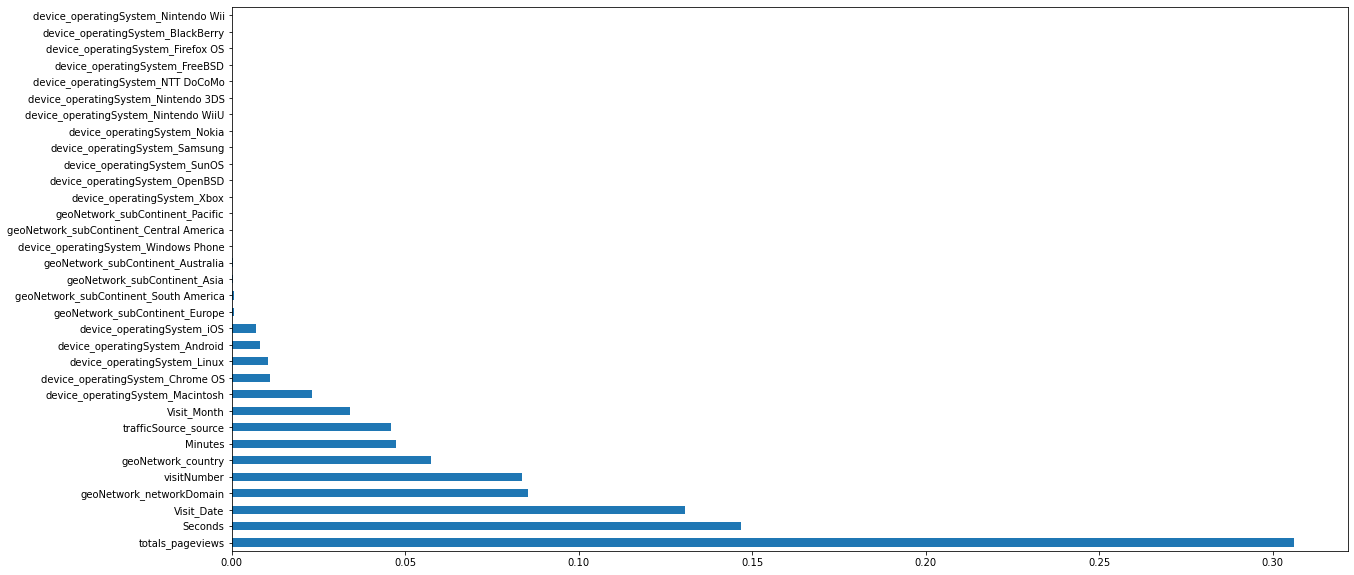

In [ ]:
plt.figure(figsize=(20,10))
(pd.Series(dt.feature_importances_, index=x_train.columns)
   .nlargest(50)
   .plot(kind='barh'))

In [ ]:
selected_feat=pd.Series(dt.feature_importances_, index=x_train.columns).nlargest(14).index
selected_feat

Index(['totals_pageviews', 'Seconds', 'Visit_Date', 'geoNetwork_networkDomain',
       'visitNumber', 'geoNetwork_country', 'Minutes', 'trafficSource_source',
       'Visit_Month', 'device_operatingSystem_Macintosh',
       'device_operatingSystem_Chrome OS', 'device_operatingSystem_Linux',
       'device_operatingSystem_Android', 'device_operatingSystem_iOS'],
      dtype='object')

In [ ]:
df_imp=df[selected_feat]

In [ ]:
df_imp

,totals_pageviews,Seconds,Visit_Date,geoNetwork_networkDomain,visitNumber,geoNetwork_country,Minutes,trafficSource_source,Visit_Month,device_operatingSystem_Macintosh,device_operatingSystem_Chrome OS,device_operatingSystem_Linux,device_operatingSystem_Android,device_operatingSystem_iOS
0,0.000000,2,2,1,0.000000,2,15,3879,9,0,0,0,0,0
1,0.000000,2,3,1,0.000000,13,15,3879,9,1,0,0,0,0
2,0.000000,2,3,7045,0.000000,2,15,3879,9,0,0,0,0,0
3,0.000000,2,3,7045,0.000000,11,15,3879,9,0,0,1,0,0
4,0.000000,2,2,7045,0.291838,16,15,3879,9,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902180,1.142063,24,4,4,0.000000,11,48,11,1,0,0,0,0,0
902181,1.123033,24,4,7045,0.000000,0,48,11,1,0,0,0,1,0
902182,1.179388,24,4,7045,0.000000,8,48,11,1,0,0,0,1,0
902183,1.183833,24,5,7045,0.000000,11,48,20,1,0,0,0,0,0


# Handling Imbalance Problem

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test,y_pred)

0.3359397625253403

In [ ]:
df.totals_transactionRevenue.value_counts()

0    890676
1     11509
Name: totals_transactionRevenue, dtype: int64

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss

In [ ]:
class_0=500000
class_1=100000

In [ ]:
# count_class_0 = 2000
# count_class_1 = 2000
# pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1})
#                     ,NearMiss(sampling_strategy={0: count_class_0}))

# x_res, y_res = pipe.fit_resample(X, Y)

In [ ]:
x=df_imp
y=df['totals_transactionRevenue']

In [ ]:
pipe=make_pipeline(SMOTE(sampling_strategy={1:class_1}),
                         NearMiss(sampling_strategy={0:class_0}))

In [ ]:
# The Output will be in array
x_bal, y_bal = pipe.fit_resample(x, y)

In [ ]:
x_bal.shape

(600000, 14)

In [ ]:
y_bal.shape

(600000,)

In [ ]:
x_bal_df=pd.DataFrame(x_bal,columns=x.columns)
# y can be array

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_bal_df,y_bal,test_size=0.3,random_state=10,stratify=y_bal)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    150000
           1       0.91      0.92      0.92     30000

    accuracy                           0.97    180000
   macro avg       0.95      0.95      0.95    180000
weighted avg       0.97      0.97      0.97    180000



**Checking with Multiple Models**

In [ ]:
x_bal_df.head(3)

,totals_pageviews,Seconds,Visit_Date,geoNetwork_networkDomain,visitNumber,geoNetwork_country,Minutes,trafficSource_source,Visit_Month,device_operatingSystem_Macintosh,device_operatingSystem_Chrome OS,device_operatingSystem_Linux,device_operatingSystem_Android,device_operatingSystem_iOS
0,1.123033,48.0,28.0,7045.0,0.0,10953.0,53.0,2042.0,4.0,1.0,0.0,0.0,0.0,0.0
1,1.133148,48.0,28.0,7045.0,0.0,10953.0,53.0,2042.0,4.0,1.0,0.0,0.0,0.0,0.0
2,1.111444,17.0,17.0,7045.0,0.0,10953.0,50.0,2042.0,2.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y_bal

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)

In [ ]:
clf1 = DecisionTreeClassifier(random_state=0)

In [ ]:
bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=21, max_samples=0.8,oob_score=True, random_state=0)
#bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=11, max_samples=0.8,oob_score=True, random_state=0)

In [ ]:
from sklearn.metrics import make_scorer,recall_score

scorer=make_scorer(recall_score,average='weighted')

score1 = cross_val_score(clf1, x_bal_df, y_bal, cv=kf, scoring=scorer)
score2 = cross_val_score(bagging1,x_bal_df, y_bal, cv=kf, scoring=scorer)
#score3 = cross_val_score(bagging2,x_bal_df, y_bal, cv=kf, scoring=scorer)

In [ ]:
np.mean(score1), np.std(score1)

(0.9723383333333333, 0.0005107891498020981)

In [ ]:
np.mean(score2), np.std(score2)

(0.9783216666666666, 0.00032670918090693863)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf1 = RandomForestClassifier(random_state=0)
clf2 = XGBClassifier(random_state=0)

In [ ]:
for i,j in zip([clf1,clf2],['RF','XG']):
    scorer=make_scorer(recall_score,average='weighted')
    score_vot = cross_val_score(i, x_bal_df, y_bal, cv=kf, scoring=scorer)
    print(j,np.mean(score_vot),np.std(score_vot))

RF 0.9787866666666666 0.0005028695434978854
XG 0.9660233333333335 0.0006419458267209504


**HyperParameter Tuning**

In [ ]:
x_bal_df=pd.DataFrame(x_bal,columns=x.columns)
y_bal

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# Parameter Tuning
be=[]
ve=[]
for i in [5,10,20,40,60,80,100,120,150,200,250,300,400]:
    #for j in [10,15,20,30]:
    rf=RandomForestClassifier(n_estimators=i,random_state=48)
    #scorer = make_scorer(f1_score, average = 'weighted')
    score=cross_val_score(rf,x_bal_df,y_bal,cv=kf,scoring='recall')
    print('n_estimator:',i)
    print('Bias Error',1-np.mean(score))
    print('Variance Error',np.std(score)/np.mean(score))
    be.append(1-np.mean(score))
    ve.append(np.std(score)/np.mean(score))

n_estimator: 5
Bias Error 0.07149208018855635
Variance Error 0.002682937119515393
n_estimator: 10
Bias Error 0.07652647855931605
Variance Error 0.0023877605372424927
n_estimator: 20
Bias Error 0.0691232141855751
Variance Error 0.0022954416046807717
n_estimator: 40
Bias Error 0.06624181400833196
Variance Error 0.0025600100451193433
n_estimator: 60
Bias Error 0.06523467339028832
Variance Error 0.0022354601021411
n_estimator: 80
Bias Error 0.06475512290543395
Variance Error 0.0023233623913645786
n_estimator: 100
Bias Error 0.06481495749385202
Variance Error 0.0021920766644133085
n_estimator: 120
Bias Error 0.06422375578684547
Variance Error 0.002330197548745334
n_estimator: 150
Bias Error 0.06408194858097682
Variance Error 0.0024366495933717865
n_estimator: 200
Bias Error 0.06377422858486592
Variance Error 0.002060653882915318
n_estimator: 250
Bias Error 0.0636334677479441
Variance Error 0.002271182331290395
n_estimator: 300
Bias Error 0.06385500181716419
Variance Error 0.0020931125821747

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params={#'n_estimators':[50,80,100,120,140,190,200,210],
#         'max_features':['auto','sqrt','log2'],
#         'criterion':['gini','entropy'],
#         'max_depth':[10,15,20,25,30]}

In [ ]:
# rf=RandomForestClassifier()
# hyp_mod=GridSearchCV(rf,param_grid=params,scoring='recall')

In [ ]:
# tun_mod=hyp_mod.fit(x_bal_df, y_bal)

In [ ]:
# tun_mod.best_params_

{'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt'}

In [ ]:
# Best Parameters => {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt'}

In [ ]:
# tun_mod.best_score_

0.95304

**PCA**

In [ ]:
x_bal_df=pd.DataFrame(x_bal,columns=x.columns)
y_bal

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
x=x_bal_df
y=y_bal

In [ ]:
x.head()

,totals_pageviews,Seconds,Visit_Date,geoNetwork_networkDomain,visitNumber,geoNetwork_country,Minutes,trafficSource_source,Visit_Month,device_operatingSystem_Macintosh,device_operatingSystem_Chrome OS,device_operatingSystem_Linux,device_operatingSystem_Android,device_operatingSystem_iOS
0,1.123033,48.0,28.0,7045.0,0.0,10953.0,53.0,2042.0,4.0,1.0,0.0,0.0,0.0,0.0
1,1.133148,48.0,28.0,7045.0,0.0,10953.0,53.0,2042.0,4.0,1.0,0.0,0.0,0.0,0.0
2,1.111444,17.0,17.0,7045.0,0.0,10953.0,50.0,2042.0,2.0,1.0,0.0,0.0,0.0,0.0
3,1.142063,17.0,17.0,7045.0,0.0,10953.0,50.0,2042.0,2.0,1.0,0.0,0.0,0.0,0.0
4,1.142063,17.0,17.0,7045.0,0.0,10953.0,50.0,2042.0,2.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(x)
inp_sc=pd.DataFrame(inp_sc,columns=x.columns)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_mod=PCA(x.shape[1])
pcadata=pca_mod.fit_transform(inp_sc)

In [ ]:
pcadata=pd.DataFrame(pcadata,columns=['PC1','PC2','PC3','PC4',
                                      'PC5','PC6','PC7','PC8',
                                      'PC9','PC10','PC11','PC12',
                                      'PC13','PC14'])

In [ ]:
exp_var=pca_mod.explained_variance_ratio_

In [ ]:
cum_var=exp_var[0]
itr=2
for j in exp_var[1:]:
    cum_var=cum_var+j
    if cum_var>0.95:
        break
    itr=itr+1

print('The 95 percent of varaince is explained by',itr, ' Principle components')

The 95 percent of varaince is explained by 12  Principle components


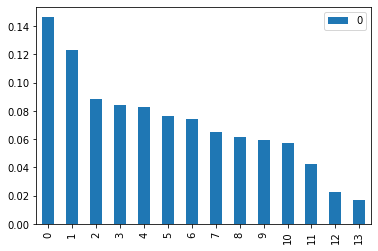

In [ ]:
pd.DataFrame(exp_var).plot(kind='bar')

In [ ]:
pcadata1=pcadata.iloc[:,:12]

In [ ]:
pcadata1.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.632072,-1.751663,-0.198802,0.382430,-1.589683,-0.596446,-1.354624,1.039375,0.64665,-1.273318,0.306043,0.619983
1,-0.640757,-1.754636,-0.198471,0.383293,-1.589902,-0.594117,-1.354654,1.036085,0.63898,-1.281663,0.314749,0.630957


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=48)
xtrain1,xtest1,ytrain1,ytest1=train_test_split(pcadata1,y,test_size=0.3,random_state=48)

In [ ]:
mod=RandomForestClassifier(random_state=0)
mod.fit(xtrain,ytrain)
ypred=mod.predict(xtest)
print("Without PCA",recall_score(ytest,ypred))

Without PCA 0.9358247766368849


In [ ]:
mod1=RandomForestClassifier(random_state=0)
mod1.fit(xtrain1,ytrain1)
ypred1=mod1.predict(xtest1)
print("With PCA",recall_score(ytest1,ypred1))

With PCA 0.9294905987464995


In [ ]:
x_bal_df.shape

(600000, 14)

In [ ]:
# Final Model

In [ ]:
x=x_bal_df
y=y_bal

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=48,stratify=y)
xtrain1,xtest1,ytrain1,ytest1=train_test_split(pcadata1,y,test_size=0.3,random_state=48,stratify=y)

In [ ]:
# mod=RandomForestClassifier(**,random_state=0)
# Best Parameters => {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt'}
mod_final=RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=20, max_features='sqrt', random_state=0)
mod_final.fit(xtrain,ytrain)
ypred=mod_final.predict(xtest)

In [ ]:
print("Recall Score without PCA",recall_score(ytest1,ypred))

Recall Score without PCA 0.9475


In [ ]:
mod_pca_final=RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=20, max_features='sqrt', random_state=0)
mod_pca_final.fit(xtrain1,ytrain1)
ypred=mod_pca_final.predict(xtest1)

In [ ]:
print("Recall Score With PCA",recall_score(ytest1,ypred))

Recall Score With PCA 0.9331666666666667


In [ ]:
print(confusion_matrix(ytest1,ypred))

[[146806   3194]
 [  2005  27995]]
